# Clustering locations of traffic cameras in Hong Kong using Amazon SageMaker and k-means

In [34]:
bucket_name = 'traffic-cameras-k-means'

In [146]:
import pandas as pd

cameras = pd.read_csv('Traffic_Camera_Locations_En.csv')
cameras.head()

,key,region,description,easting,northing,latitude,longitude,url
0,H429F,Hong Kong Island,Aberdeen Praya Road near Fish Market,833514,812196,22.248525,114.150158,http://tdcctv.data.one.gov.hk/H429F.JPG
1,H210F,Hong Kong Island,Aberdeen Tunnel - Wan Chai Side,836504,815117,22.274906,114.179164,http://tdcctv.data.one.gov.hk/H210F.JPG
2,H421F,Hong Kong Island,Aberdeen Tunnel - Aberdeen Side,836245,812386,22.250244,114.176651,http://tdcctv.data.one.gov.hk/H421F.JPG
3,H422F2,Hong Kong Island,Ap Lei Chau Bridge Road near Aberdeen Police S...,834632,812129,22.247922,114.161003,http://tdcctv.data.one.gov.hk/H422F2.JPG
4,H904F,Hong Kong Island,Canal Road Flyover near Gloucester Road,836731,815614,22.279394,114.181367,http://tdcctv.data.one.gov.hk/H904F.JPG


In [147]:
cameras.count()

key            210
region         210
description    210
easting        210
northing       210
latitude       210
longitude      210
url            210
dtype: int64

In [20]:
cameras.groupby('region').count()

,key,description,easting,northing,latitude,longitude,url,geometry
region,,,,,,,,
Hong Kong Island,34,34,34,34,34,34,34,34
Kowloon,58,58,58,58,58,58,58,58
Lantau,16,16,16,16,16,16,16,16
Shatin & Ma On Shan,24,24,24,24,24,24,24,24
"Tai Po, North & Yuen Long",31,31,31,31,31,31,31,31
Tsuen Wan,18,18,18,18,18,18,18,18
Tuen Mun & Tin Shui Wai,29,29,29,29,29,29,29,29


In [50]:
!pip install --upgrade pip --quiet
!pip install geopandas --quiet
!pip install descartes --quiet
!pip install mxnet --quiet

In [25]:
from geopandas import GeoDataFrame, points_from_xy

cameras_geo = GeoDataFrame(cameras, geometry=points_from_xy(cameras.longitude, cameras.latitude))
cameras_geo.head()

,key,region,description,easting,northing,latitude,longitude,url,geometry
0,H429F,Hong Kong Island,Aberdeen Praya Road near Fish Market,833514,812196,22.248525,114.150158,http://tdcctv.data.one.gov.hk/H429F.JPG,POINT (114.1501576 22.2485255)
1,H210F,Hong Kong Island,Aberdeen Tunnel - Wan Chai Side,836504,815117,22.274906,114.179164,http://tdcctv.data.one.gov.hk/H210F.JPG,POINT (114.1791642 22.27490622)
2,H421F,Hong Kong Island,Aberdeen Tunnel - Aberdeen Side,836245,812386,22.250244,114.176651,http://tdcctv.data.one.gov.hk/H421F.JPG,POINT (114.1766512 22.25024351)
3,H422F2,Hong Kong Island,Ap Lei Chau Bridge Road near Aberdeen Police S...,834632,812129,22.247922,114.161003,http://tdcctv.data.one.gov.hk/H422F2.JPG,POINT (114.1610034 22.24792186)
4,H904F,Hong Kong Island,Canal Road Flyover near Gloucester Road,836731,815614,22.279394,114.181367,http://tdcctv.data.one.gov.hk/H904F.JPG,POINT (114.1813669 22.2793944)


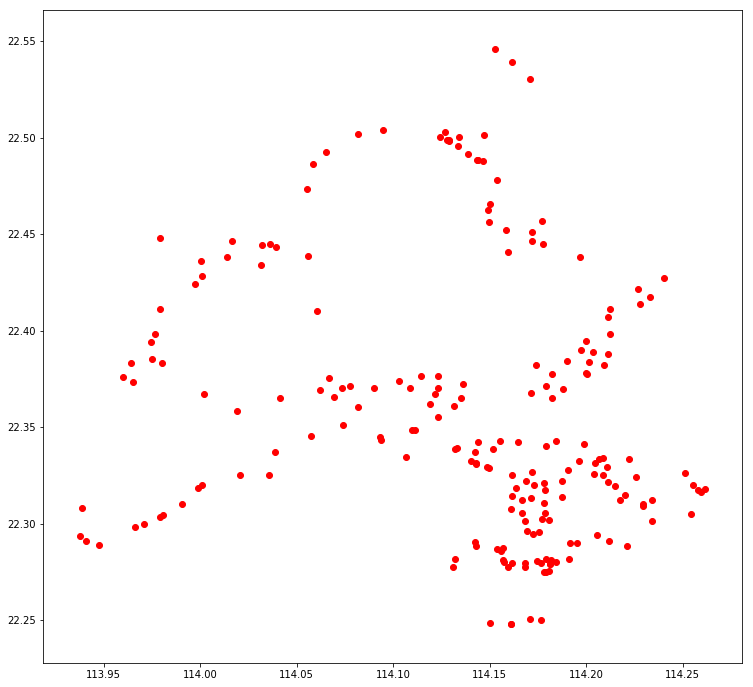

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [19, 12]

cameras_geo.plot(color='red')

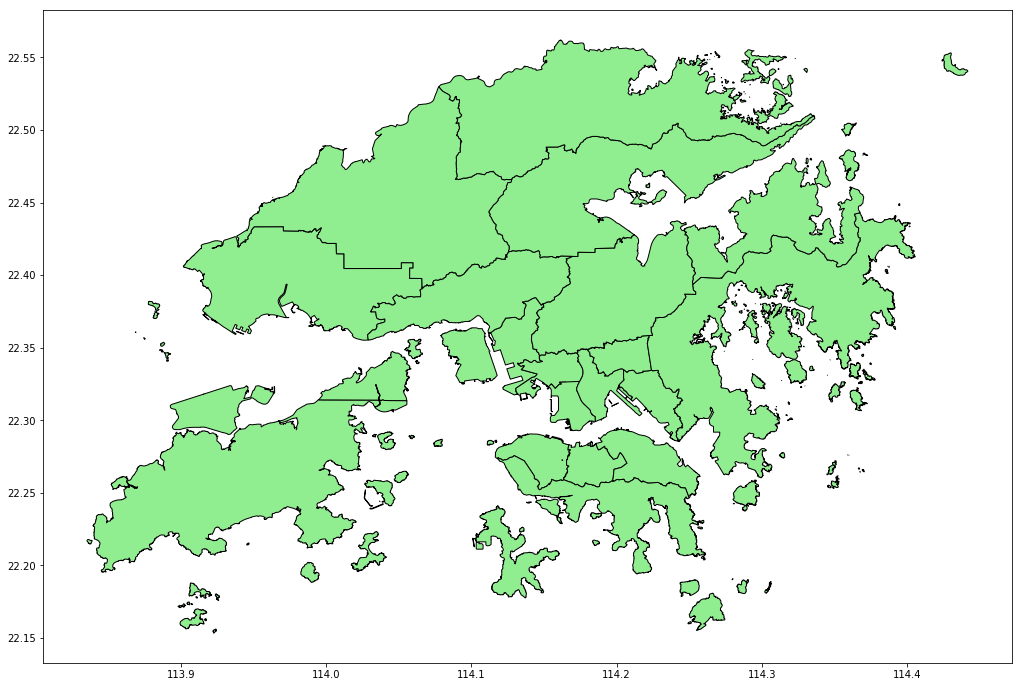

In [27]:
hong_kong = GeoDataFrame.from_file('Hong_Kong_18_Districts/')
hong_kong.plot(color='lightgreen', edgecolor='black')

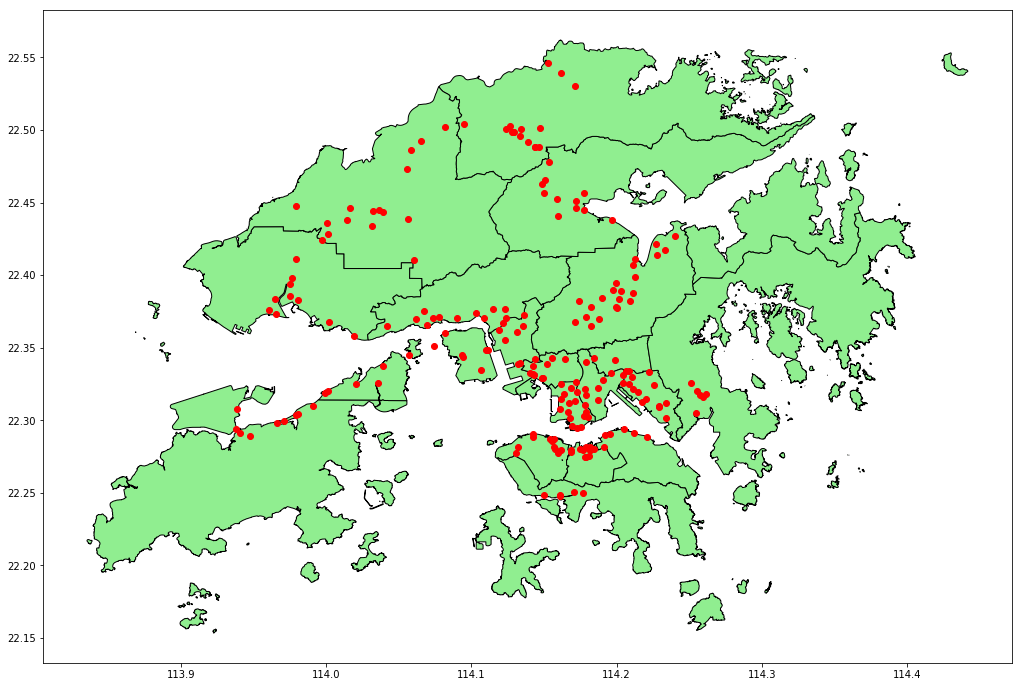

In [28]:
axes = hong_kong.plot(color='lightgreen', edgecolor='black')
cameras_geo.plot(ax=axes, color='red')

In [29]:
cameras.dtypes

key             object
region          object
description     object
easting          int64
northing         int64
latitude       float64
longitude      float64
url             object
geometry        object
dtype: object

In [30]:
from sagemaker import KMeans, get_execution_role

In [162]:
kmeans = KMeans(role=get_execution_role(),
                train_instance_count=1,
                train_instance_type='ml.c4.xlarge',
                output_path='s3://' + bucket_name + '/',
                k=10)

In [163]:
train_df = cameras[['latitude', 'longitude']]
train_df.head()

,latitude,longitude
0,22.248525,114.150158
1,22.274906,114.179164
2,22.250244,114.176651
3,22.247922,114.161003
4,22.279394,114.181367


In [164]:
train_data = train_df.values.astype('float32')
train_data

array([[ 22.248526, 114.150154],
       [ 22.274906, 114.17916 ],
       [ 22.250244, 114.17665 ],
       [ 22.247921, 114.161   ],
       [ 22.279394, 114.181366],
       [ 22.279305, 114.181404],
       [ 22.281752, 114.19122 ],
       [ 22.285967, 114.15575 ],
       [ 22.286888, 114.15399 ],
       [ 22.277687, 114.159645],
       [ 22.281282, 114.18192 ],
       [ 22.28054 , 114.174446],
       [ 22.27971 , 114.176544],
       [ 22.281607, 114.179085],
       [ 22.27982 , 114.16856 ],
       [ 22.277832, 114.1685  ],
       [ 22.291067, 114.21197 ],
       [ 22.294012, 114.20541 ],
       [ 22.288265, 114.221146],
       [ 22.29022 , 114.195274],
       [ 22.275738, 114.180855],
       [ 22.281425, 114.15707 ],
       [ 22.28179 , 114.13231 ],
       [ 22.277582, 114.130875],
       [ 22.279827, 114.16167 ],
       [ 22.280369, 114.15765 ],
       [ 22.275042, 114.17837 ],
       [ 22.248283, 114.1611  ],
       [ 22.250559, 114.17069 ],
       [ 22.280117, 114.184616],
       [ 2

In [165]:
from datetime import datetime

job_name = 'traffic-cameras-k-means-job-{}'.format(datetime.now().strftime("%Y%m%d%H%M%S"))

In [166]:
%%time
kmeans.fit(kmeans.record_set(train_data), job_name=job_name)

2019-08-17 09:23:23 Starting - Starting the training job...
2019-08-17 09:23:25 Starting - Launching requested ML instances......
2019-08-17 09:24:24 Starting - Preparing the instances for training......
2019-08-17 09:25:52 Downloading - Downloading input data
2019-08-17 09:25:52 Training - Downloading the training image...
2019-08-17 09:26:24 Uploading - Uploading generated training model
Docker entrypoint called with argument(s): train
[08/17/2019 09:26:13 INFO 140069129189184] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'_enable_profiler': u'false', u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'local_lloyd_num_trials': u'auto', u'_log_level': u'info', u'_kvstore': u'auto', u'local_lloyd_init_method': u'kmeans++', u'force_dense': u'true', u'epochs': u'1', u'init_method': u'random', u'local_lloyd_tol': u'0.0001', u'local_lloyd_max_iter': u'300', u'_disable_wait_to_read': u'false', u'extra_center_fact

In [167]:
import boto3

model_key = job_name + '/output/model.tar.gz'
boto3.resource('s3').Bucket(bucket_name).download_file(model_key, 'model.tar.gz')

In [168]:
import os

os.system('tar -zxvf model.tar.gz')

0

In [169]:
os.system('unzip model_algo-1')

2304

In [170]:
import mxnet as mx

Kmeans_model_params = mx.ndarray.load('model_algo-1')
Kmeans_model_params

[
 [[ 22.317282 114.21375 ]
  [ 22.449343 114.03215 ]
  [ 22.304926 113.96935 ]
  [ 22.457878 114.162346]
  [ 22.290783 114.168236]
  [ 22.348978 114.1301  ]
  [ 22.384457 113.97006 ]
  [ 22.502146 114.13845 ]
  [ 22.390093 114.20028 ]
  [ 22.360302 114.05791 ]]
 <NDArray 10x2 @cpu(0)>]

In [171]:
cluster_centroids = pd.DataFrame(Kmeans_model_params[0].asnumpy())
cluster_centroids.columns = train_df.columns

In [172]:
cluster_centroids

,latitude,longitude
0,22.317282,114.213753
1,22.449343,114.032150
2,22.304926,113.969353
3,22.457878,114.162346
4,22.290783,114.168236
5,22.348978,114.130096
6,22.384457,113.970062
7,22.502146,114.138451
8,22.390093,114.200279
9,22.360302,114.057907


In [173]:
centroids_geo = GeoDataFrame(
    cluster_centroids, geometry=points_from_xy(cluster_centroids.longitude, cluster_centroids.latitude))

In [174]:
centroids_geo

,latitude,longitude,geometry
0,22.317282,114.213753,POINT (114.213752746582 22.31728172302246)
1,22.449343,114.032150,POINT (114.0321502685547 22.44934272766113)
2,22.304926,113.969353,POINT (113.969352722168 22.3049259185791)
3,22.457878,114.162346,POINT (114.1623458862305 22.45787811279297)
4,22.290783,114.168236,POINT (114.1682357788086 22.2907829284668)
5,22.348978,114.130096,POINT (114.1300964355469 22.34897804260254)
6,22.384457,113.970062,POINT (113.9700622558594 22.38445663452148)
7,22.502146,114.138451,POINT (114.1384506225586 22.50214576721191)
8,22.390093,114.200279,POINT (114.2002792358398 22.39009284973145)
9,22.360302,114.057907,POINT (114.0579071044922 22.36030197143555)


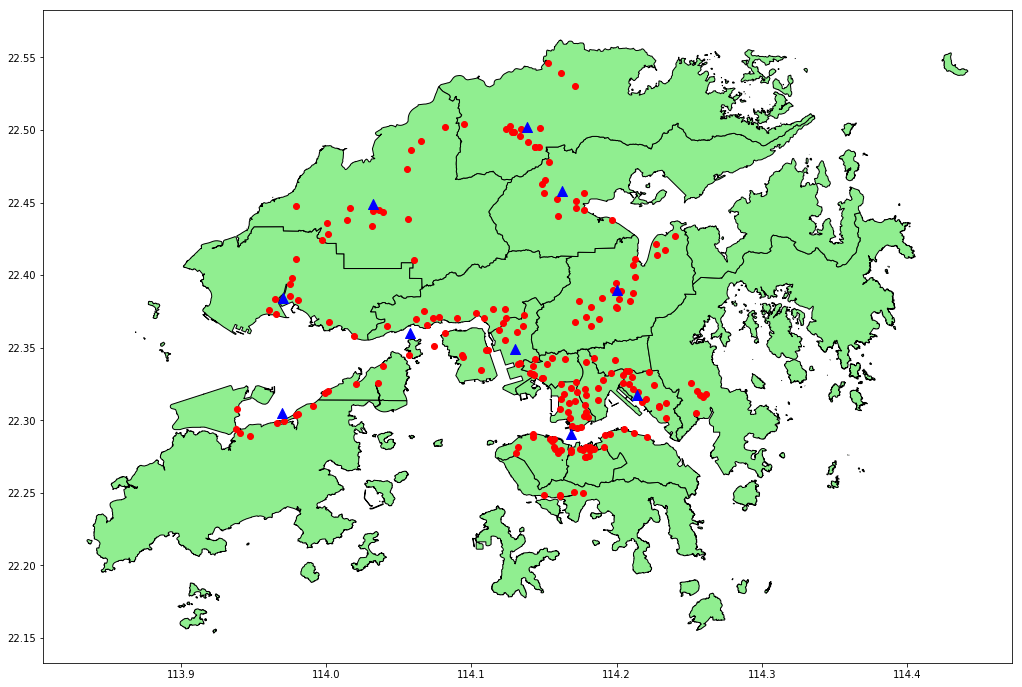

In [175]:
axes = hong_kong.plot(color='lightgreen', edgecolor='black')
cameras_geo.plot(ax=axes, color='red')
centroids_geo.plot(ax=axes, marker='^', color='blue', markersize=100)